In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
MY_PATH = '/content/drive/MyDrive/Colab Notebooks/temp/'
data_file = MY_PATH + 'DM_A3.csv'

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import trapz
from sklearn.metrics import auc

In [7]:
df = pd.read_csv(data_file)

In [54]:
thresholds = list(np.array(list(range(0, 11, 1)))/10)
roc_point = []
y_pred = []
y_true = []

for t in thresholds:
  tp = 0; fp = 0; fn = 0; tn = 0

  for index, instance in df.iterrows():
      actual = instance["actual"]
      prediction = instance["prediction"]
      
      y_pred.append(prediction)
      y_true.append(actual)

      if prediction >= t:
        prediction_class = 1
      else:
        prediction_class = 0

      if prediction_class == 1 and actual == 1:
          tp = tp + 1
      elif actual == 1 and prediction_class == 0:
          fn = fn + 1
      elif actual == 0 and prediction_class == 1: 
          fp = fp + 1
      elif actual == 0 and prediction_class == 0:
            tn = tn + 1

      #print(tp, fp, fn, tn)
      
  tpr = tp / (tp + fn)
      
  fpr = fp / (tn + fp)
      
      

      #print(tpr, fpr)
  roc_point.append([tpr, fpr])


  try:
      accuracy = (tp+tn) / (tp + fp + fn + tn)

  except ZeroDivisionError:
        accuracy = 0
    
  try:
      precision = tp/(tp+fp)

  except ZeroDivisionError:
      precision = 0

  recall = tp/ (tp + fn)
    
  try:
      f1 = 2 * ((precision * recall)/ (precision + recall))

  except ZeroDivisionError:
      f1 = 0

    
  print({"Accuracy":accuracy,"Precision":precision,"Recall":recall,"F1_score":f1})

{'Accuracy': 0.5, 'Precision': 0.5, 'Recall': 1.0, 'F1_score': 0.6666666666666666}
{'Accuracy': 0.5, 'Precision': 0.5, 'Recall': 1.0, 'F1_score': 0.6666666666666666}
{'Accuracy': 0.65, 'Precision': 0.5882352941176471, 'Recall': 1.0, 'F1_score': 0.7407407407407407}
{'Accuracy': 0.7, 'Precision': 0.625, 'Recall': 1.0, 'F1_score': 0.7692307692307693}
{'Accuracy': 0.7, 'Precision': 0.6428571428571429, 'Recall': 0.9, 'F1_score': 0.75}
{'Accuracy': 0.75, 'Precision': 0.7272727272727273, 'Recall': 0.8, 'F1_score': 0.761904761904762}
{'Accuracy': 0.8, 'Precision': 0.875, 'Recall': 0.7, 'F1_score': 0.7777777777777777}
{'Accuracy': 0.65, 'Precision': 0.8, 'Recall': 0.4, 'F1_score': 0.5333333333333333}
{'Accuracy': 0.6, 'Precision': 1.0, 'Recall': 0.2, 'F1_score': 0.33333333333333337}
{'Accuracy': 0.55, 'Precision': 1.0, 'Recall': 0.1, 'F1_score': 0.18181818181818182}
{'Accuracy': 0.5, 'Precision': 0, 'Recall': 0.0, 'F1_score': 0}


In [55]:
df_scores = pd.DataFrame(roc_point, columns = ["tpr", "fpr"])
df_scores["threshold"] = thresholds

In [56]:
df_scores

,tpr,fpr,threshold
0,1.0,1.0,0.0
1,1.0,1.0,0.1
2,1.0,0.7,0.2
3,1.0,0.6,0.3
4,0.9,0.5,0.4
5,0.8,0.3,0.5
6,0.7,0.1,0.6
7,0.4,0.1,0.7
8,0.2,0.0,0.8
9,0.1,0.0,0.9


In [57]:
print("AUC")
auc(df_scores.fpr, df_scores.tpr)

AUC


0.8450000000000001

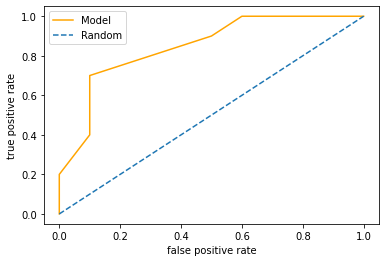

In [58]:
#plt.scatter(df_scores.fpr, df_scores.tpr, linestyle='-',color='orange', label='Model')
plt.plot(df_scores.fpr, df_scores.tpr, linestyle='-',color='orange', label='Model')
#plt.plot([0, 1])
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()